# Bathymetry

This is a simple example to show how to plot the model bathymetry. It uses `cartopy`, and the bathymetry used for the ACCESS-OM2 0.1° model.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cft
import cartopy.mpl.ticker as cticker
import cmocean as cm # beautiful colour maps
import IPython.display

First we load the bathymetry and the ocean grid.

In [2]:
bathymetry = xr.open_dataset('/g/data/hh5/tmp/cosima/bathymetry/topog_latest.nc')
oceangrid = xr.open_dataset('/g/data/hh5/tmp/cosima/bathymetry/ocean_hgrid.nc')

`ocean_hgrid` contains the, so-called, "supergrid". To plot `bathymetry` we, therefore, need to use alternate values for the longitudes and latitudes from `ocean_hgrid`.

In [3]:
lons, lats = oceangrid.x.values[::2, ::2], oceangrid.y.values[::2, ::2]

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


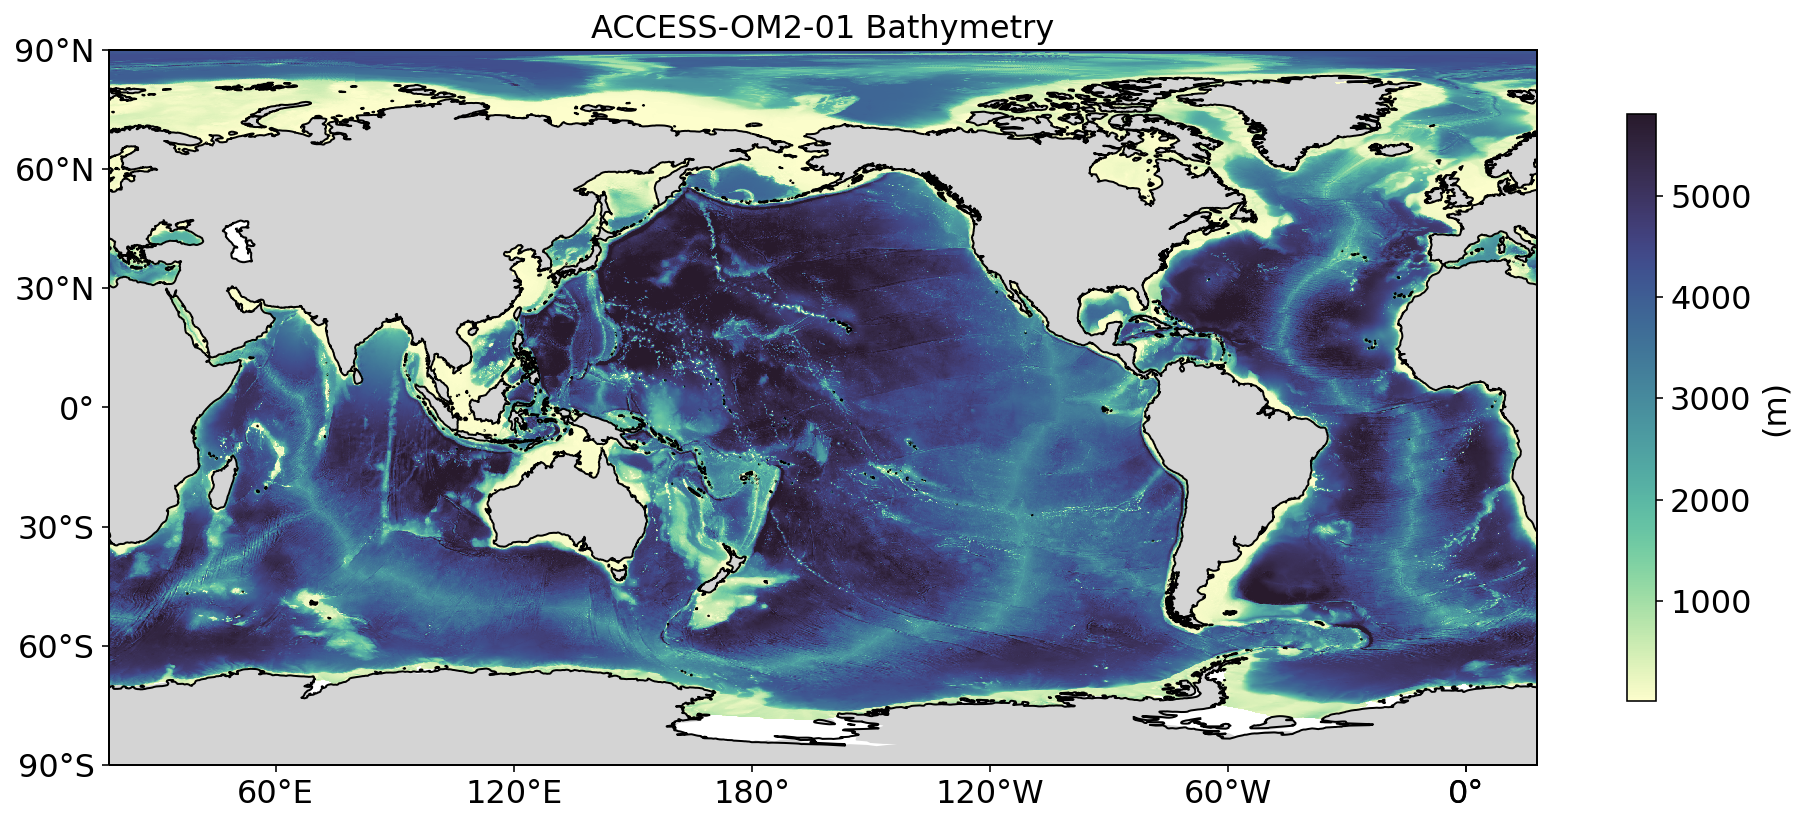

In [4]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=198)) # Pacific-centered
ax.coastlines(resolution='50m') # add coastlines
ax.add_feature(cft.LAND,color=[.83, .83, .83]) # grey land colour
plt.pcolormesh(lons, lats, bathymetry.depth, cmap=cm.cm.deep, transform=ccrs.PlateCarree()) 
plt.colorbar(shrink=0.6).set_label('(m)', fontsize=16)
plt.title('ACCESS-OM2-01 Bathymetry', fontsize=16)

# set colour bar tick size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

# set custom longitude and latitude values with correct formatting
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())   
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.yaxis.tick_left()
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter) # set format of x-axis
ax.yaxis.set_major_formatter(lat_formatter) # "       "       "
ax.xaxis.label.set_visible(False) # only labels on left & bottom
ax.yaxis.label.set_visible(False)
# set longitude and latitude tick size
ax.tick_params(labelsize=16);
        
# plt.savefig('bathyetry', dpi=300, facecolor='w', edgecolor='w', orientation='landscape', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

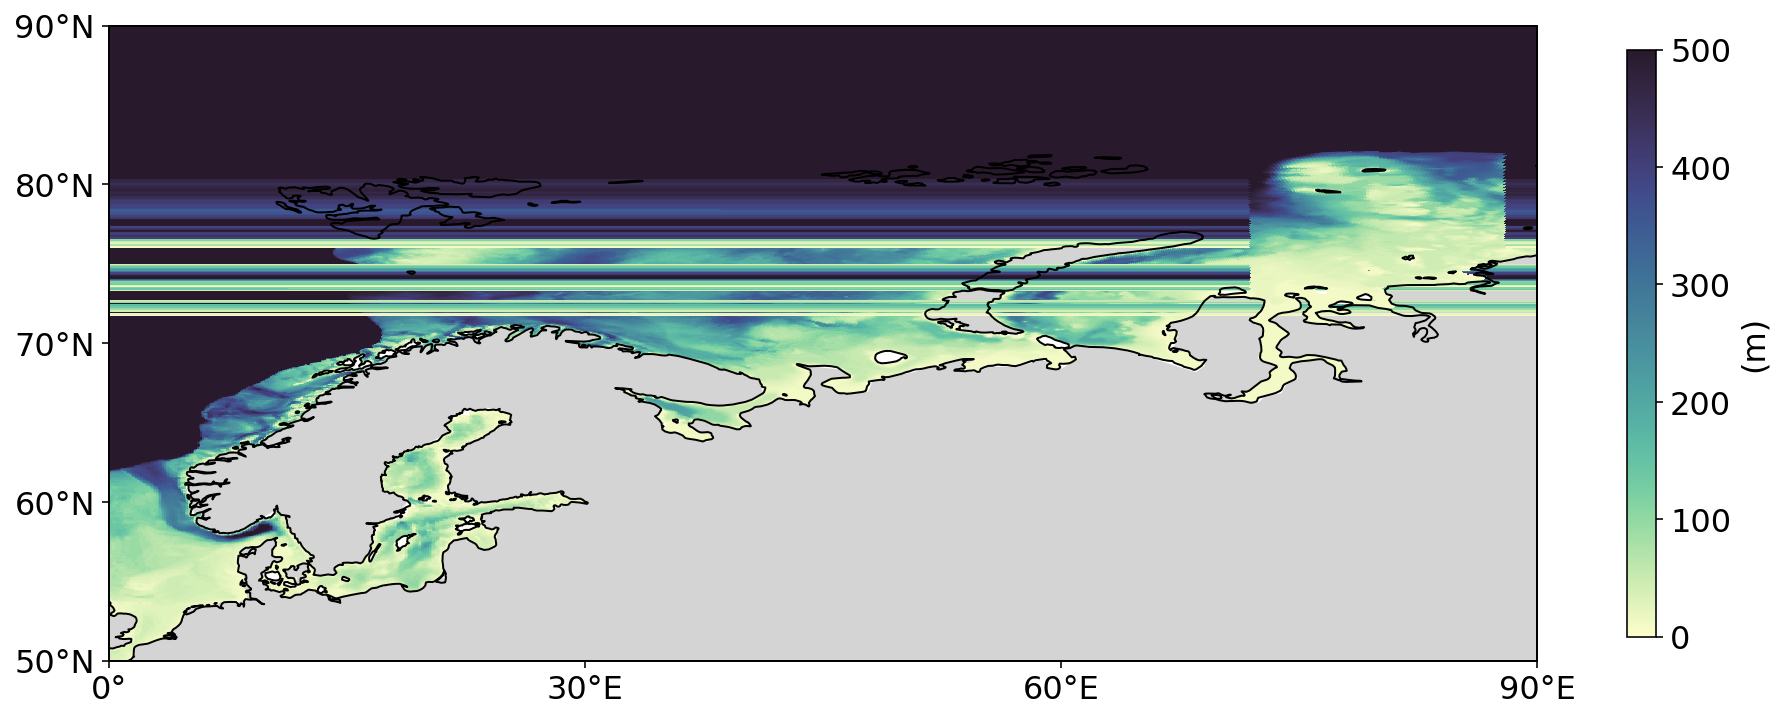

In [5]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=72)) 
ax.coastlines(resolution='50m') # add coastlines
ax.set_extent([0, 90, 50, 90])
ax.add_feature(cft.LAND,color=[.83, .83, .83]) # grey land colour
plt.pcolormesh(lons, lats, bathymetry.depth, cmap=cm.cm.deep, vmin=0, vmax=500,transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6).set_label('(m)', fontsize=16)


# set colour bar tick size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

# set custom longitude and latitude values with correct formatting
ax.set_xticks([0, 30, 60, 90], crs=ccrs.PlateCarree())   
ax.set_yticks([50, 60, 70, 80, 90], crs=ccrs.PlateCarree())
ax.yaxis.tick_left()
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter) # set format of x-axis
ax.yaxis.set_major_formatter(lat_formatter) # "       "       "
ax.xaxis.label.set_visible(False) # only labels on left & bottom
ax.yaxis.label.set_visible(False)
# set longitude and latitude tick size
ax.tick_params(labelsize=16);

`pcolormesh` in `cartopy` seems to encounter an issue above (especially in the tripolar region). This can be circumwented by changing the `central_longitude` parameter, as done below.

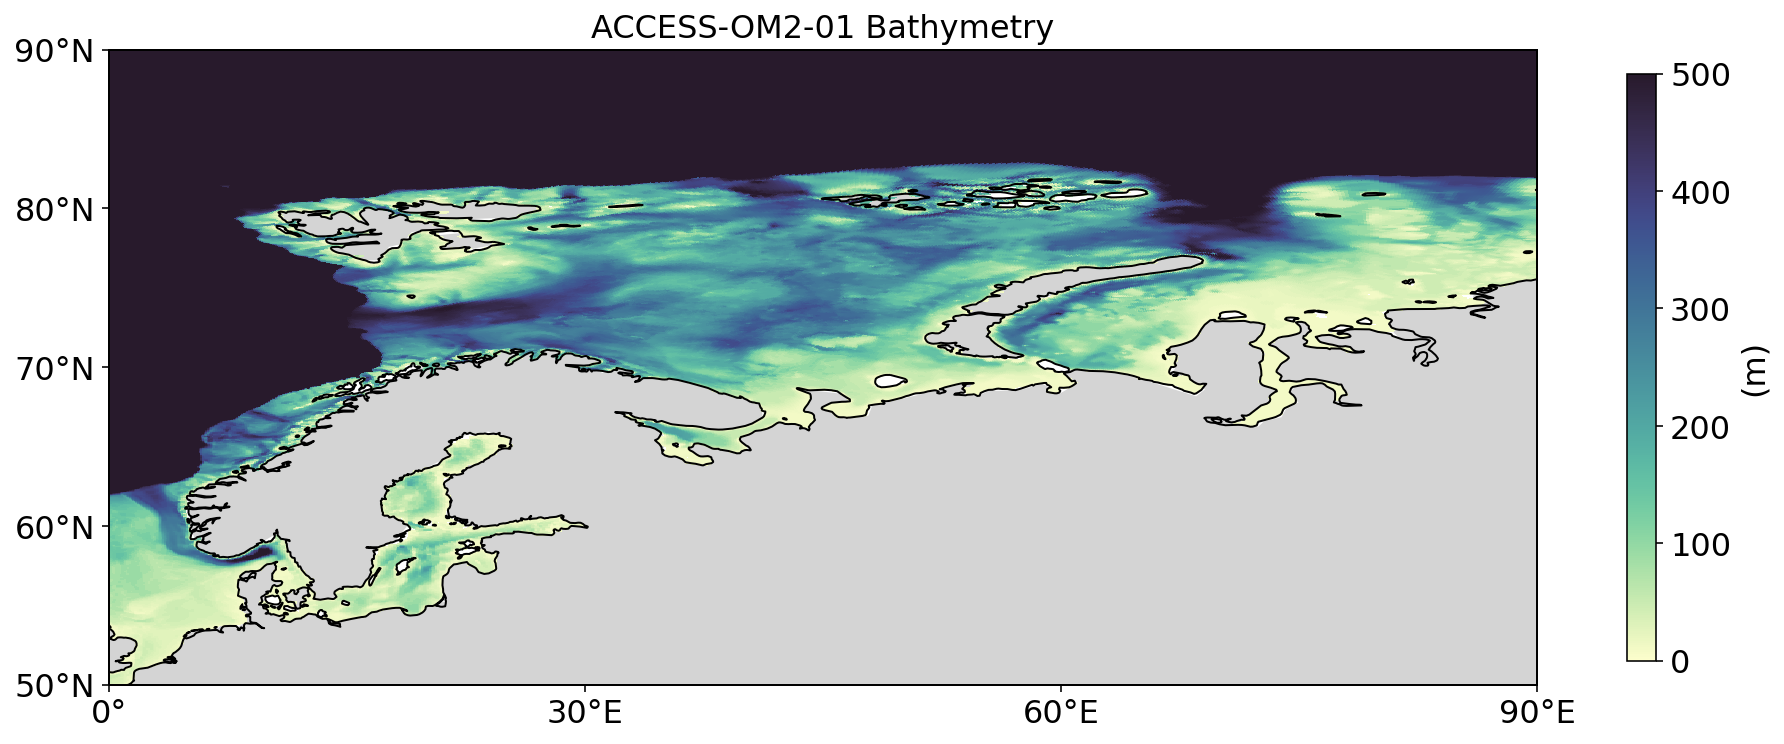

In [6]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines(resolution='50m') # add coastlines
ax.set_extent([0, 90, 50, 90])
ax.add_feature(cft.LAND,color=[.83, .83, .83]) # grey land colour
plt.pcolormesh(lons, lats, bathymetry. depth, cmap=cm.cm.deep, vmin=0, vmax=500, transform=ccrs.PlateCarree()) 
plt.colorbar(shrink=0.6).set_label('(m)', fontsize=16)
plt.title('ACCESS-OM2-01 Bathymetry', fontsize=16)

# set colour bar tick size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

# set custom longitude and latitude values with correct formatting
ax.set_xticks([0, 30, 60, 90], crs=ccrs.PlateCarree())   
ax.set_yticks([50, 60, 70, 80, 90], crs=ccrs.PlateCarree())
ax.yaxis.tick_left()
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter) # set format of x-axis
ax.yaxis.set_major_formatter(lat_formatter) # "       "       "
ax.xaxis.label.set_visible(False) # only labels on left & bottom
ax.yaxis.label.set_visible(False)
# set longitude and latitude tick size
ax.tick_params(labelsize=16)